# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Цели исследования** - провести исследовательский анализ данных и определить параметры, влияющие на цену объектов.

**Ход исследования**

Данные из сервиса Яндекс Недвижимость о продаже квартир с Санкт-Петербурге и соседних населенных пунктах за последние несколько лет получены из файла `/datasets/real_estate_data.csv`

Проведем обзор и предобработку данных, выявим проблемы в данных:  
- ошибки в данных (названия столбцов, типы данных);
- явные/неявные дубликаты, пропуски

Оценим влияние проблем в данных и озвучим причины, по которым они могли появиться. Затем устраним проблемные места на сколько это возможно.

Дополним таблицу подготовленными данными для дальнейшего анализа. После чего проведем исследовательский анализ данных, определим возможные зависимости между ценой объекта и рассматриваемыми параметрами, изобразим графики и сфодные таблицы по результатам исследования.

Можем сказать, что исследование пройдет по следующим этапам:
1. Обзор данных.
2. Предобработка данных.
4. Добавление новых столбцов.
3. Исследовательский анализ.

# **Оглавление**
**[1. Обзор данных](#view)**


**[2. Предобработка данных](#preprocessing)**

&emsp;[2.1. Обработка пропусков](#omissions)

&emsp;[2.2. Обработка типов данных](#data_type)

&emsp;[2.3. Обработка дубликатов](#duplicates)

**[3. Добавление новых столбцов](#new_columns)**

**[4. Исследовательский анализ](#research_analisis)**

&emsp;[4.1. Работа с аномалиями и выбросами](#anomaly)

&emsp;[4.2. Анализ скорости продажи квартир](#speed_sell)

&emsp;[4.3. Факторный анализ стоимости квартир](#price_factor)

&emsp;[4.4. Анализ топов продаж](#top_sells)

&emsp;[4.5. Влияние расстояния от центра](#range_center)

**[5. Выводы](#conclusions)**

## Обзор данных
<a id='view'></a>

Ознакомимся с данными. В датафрейме имеются следующие поля:

- `total_images` - число фотографий квартиры в объявлении
- `last_price` - цена на момент снятия с публикации
- `total_area` - бщая площадь квартиры в квадратных метрах (м²)
- `first_day_exposition` - дата публикации
- `rooms` - количество комнат
- `ceiling_height` - высота потолков (м)
- `floors_total` - количество этажей в доме
- `living_area` - жилая площадь (м²)
- `floor` - этаж
- `is_apartment` - апартаменты (булев тип)
- `studio` - квартира-студия (булев тип)
- `open_plan` - свободная планировка (булев тип)
- `kitchen_area` - площадь кухни (м²)
- `balcony` - число балконов
- `locality_name` - название населённого пункта
- `airports_nearest` - расстояние до ближайшего аэропорта в метрах (м)
- `cityCenters_nearest` - расстояние до центра города (м)
- `parks_around3000` - число парков в радиусе 3 км
- `parks_nearest` - расстояние до ближайшего парка (м)
- `ponds_around3000` - число водоемов в радиусе 3 км
- `ponds_nearest` - расстояние до ближайшего водоема (м)
- `days_exposition` - сколько дней было размещено объявление (от публикации до снятия)

Выведем общую информацию по датафрейму и его первые 5 строк.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv')

# посмотрим общую информацию о датафрейме
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                           --------------  ----- 
 0   total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Вывело один столбец, так как при составлении датафрейма использовался разделитель `\t`, изменим значение параметра `sep`. Также выведем названия стобцов.

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

data.info()
print(data.columns)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


С названиями столбцов все в порядке, однако уже можно заметить, что во многих столбцах есть пропуски и их не мало. Займемся ими позже. Сейчас отобразим гистограммы по всем числовым данным из датафрейма:

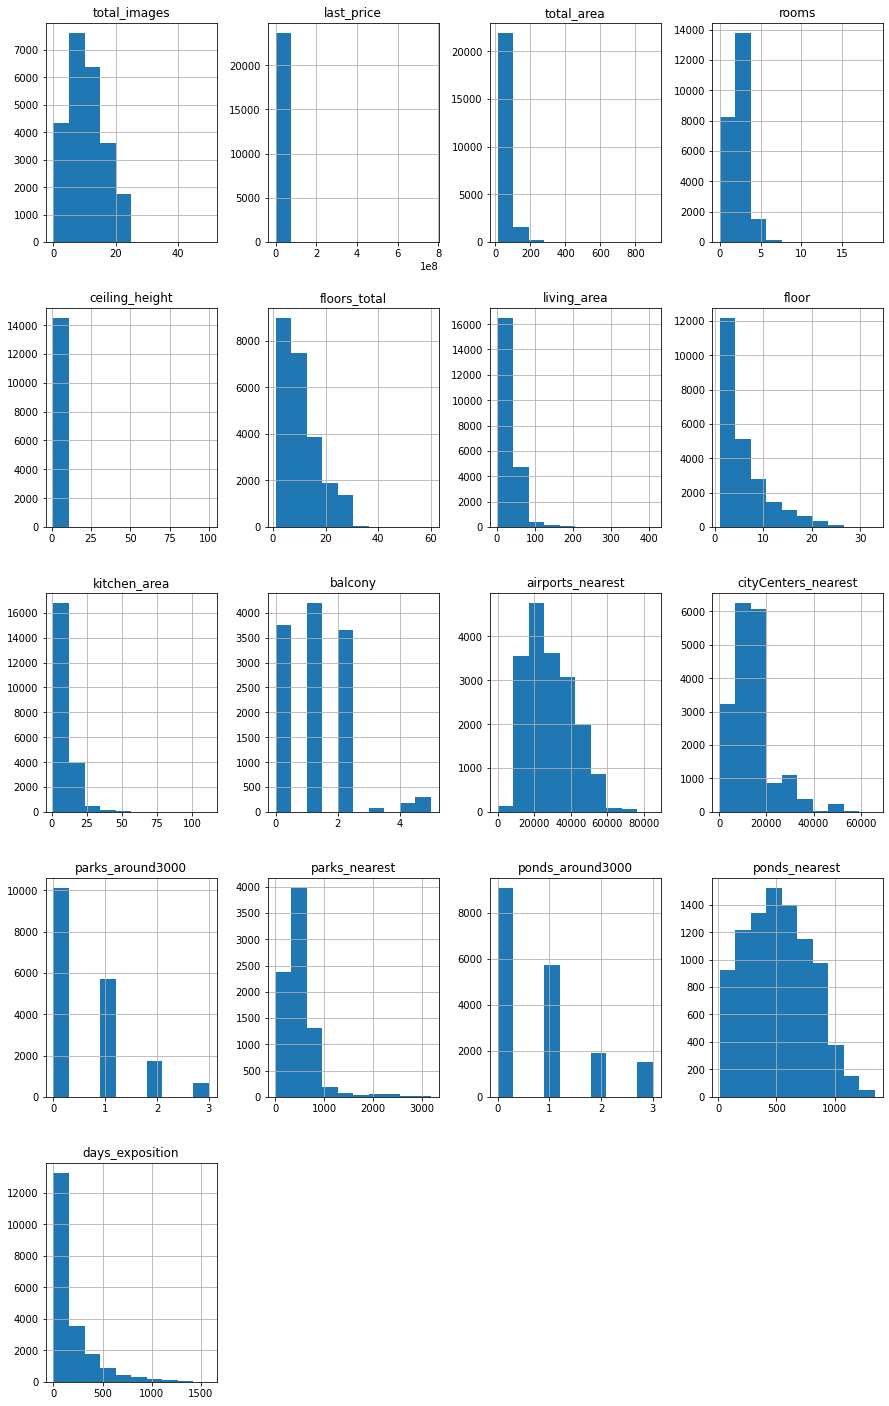

In [3]:
# изобразим гистограммы для всех числовых параметров
data.hist(figsize=(15,25));

Осмотрев гистограммы, предварительно можно сказать, что в столбцах `ceiling_height`, `last_price` точно есть выбросы, так как на гистограмме присутствует лишь один столбец. Пока что лишь зафиксируем данный факт.

## Предобработка данных
<a id='preprocessing'></a>

### Обработка пропусков
<a id='omissions'></a>

Для начала проверим наличие пропусков в таблице по каждому столбцу:

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Разберемся сначала со столбцами с наибольшим числом пропусков. Больше всего встречается пропусков в столбце `is_apartment`. Посмотрим какие значения есть в данном столбце:

In [5]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Стало понятно, что данный столбец должен относиться к булеву типу данных. Пропуски скорее всего говорят о том, что данный объект не является апартаментами, то есть вместо них нужно вставить значение `False`. Такие пропуски могли возникнуть из-за того что эти данные не требовалось вводить в некоторых случаях. Похожая ситуация со столбцом `balcony`, где скорее всего человек не указал количество балконов, потому что их на объекте нет. Исправим данные столбцы и выведем повторно пропуски для проверки:

In [6]:
# заполним пропуски в столбце 'is_apartment' значением 'False'
data['is_apartment'] = data['is_apartment'].fillna(False)
# заполним пропуски в столбце 'balcony' значением 0
data['balcony'] = data['balcony'].fillna(0)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Со столбцами `is_apartment` и `balcony` разобрались, теперь разберемся с пропусками в столбцах `parks_around3000` и `ponds_around3000`. Вероятно пропуски в этих столбцах связаны с тем, что в пределах 3 километров нет парков и прудов вовсе. Проверим, входит ли множество пропусков из столбца `ponds_around3000` в множество пропусков `ponds_nearest`, также поступим и c парками.

In [7]:
# выведем два столбца, наложив условие на один и посчитаем сумму
print(
    data.query('ponds_around3000.isna()')
    [['ponds_around3000', 'ponds_nearest']]
    .sum()
)
(
    data.query('parks_around3000.isna()')
    [['parks_around3000', 'parks_nearest']]
    .sum()
)

ponds_around3000    0.0
ponds_nearest       0.0
dtype: float64


parks_around3000    0.0
parks_nearest       0.0
dtype: float64

Пропуски пересекаются, скорее всего парков и водоемов в пределах 3 километров действительно не было и эти данные не заполнили. Заполним данные пропуски в столбцах `parks_around3000` и `ponds_around3000` нулями. Проверим количество пропусков.

In [8]:
# заполним пропуски нулями
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Все в порядке. Пропусков в столбцах `ponds_nearest` и `parks_nearest` очень много. Вероятно данные объекты находятся далеко от парков и озер, либо эти данные не вписали. Проверим, действительно ли пропуски в данных столбцах соответствуют нулевому количеству парков/озер в радиусе 3 километров.

In [9]:
print(
    data.query('ponds_around3000 == 0')['ponds_nearest'].isna().sum()
)
data.query('parks_around3000 == 0')['parks_nearest'].isna().sum()

14589


15620

Количество пропусков полностью совпадает, поэтому можно сказать, что данные пропуски появились по причине отсутствия вблизи парков и прудов. Оставляем данные как есть. 

Пропуски в столбцах `airports_nearest`, `cityCenters_nearest` вероятно связаны с тем, что объект находится либо слишком далеко от центра/аэропорта, либо потому что объект находится не в городе. Вышеперечисленные пропуски оставляем. Пропуски в столбце `locality_name` могут быть вызваны тем, что человек не указал эти данные, заполним пропуски значением `unknown`.

В столбце `ceiling_height` можем заполнить пропуски медианным значением. Пропуски в `days_exposition` могли возникнуть как по технологическим причинам, так и потому что объявление может быть все еще не снято, такие пропуски оставляем как есть. В столбце `floors_total` пропусков совсем немного, эти строки можем удалить. Проведем вышеперечисленные изменения с данными и выведем количество пропусков

In [10]:
# Заполним пропуски в столбце 'locality_name'

data['locality_name'] = /
    data['locality_name'].fillna('unknown')
    
data['ceiling_height'] = (
    data['ceiling_height']
    .fillna(value=data['ceiling_height'].median())
)
data = (
    data.dropna(subset=['floors_total'])
)

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1870
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2231
balcony                     0
locality_name               0
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000            0
parks_nearest           15568
ponds_around3000            0
ponds_nearest           14552
days_exposition          3172
dtype: int64

Остались только пропуски в столбцах `living_area` и `kitchen_area`. Пропуски во втором можем заполнить медианным значением с учетом значения из столбца `total_area`. Для начала необходимо найти долю площади кухни от всей площади объекта для каждой пары значений без пропусков, зачем найти медианное значение долей и заполнить пропуски в столбце `kitchen_area` медианой долей, умноженной на соответствующее значение из столбца `total_area`. Пропуски в столбце `living_area` заполнить медианным значением долей жилой площади, умноженными на соответствующее значение столбца `total_area`. Так как пропусков в столбце `total_area` нет, можем полностью заполнить пропуски в столбцах `living_area` и `kitchen_area`.

In [11]:
# Определим медианное значение доли площади кухни к общей площади объекта по тем строкам, где нет пропусков

median_share_kitchen = (
    (
        data.query('not kitchen_area.isna()')['kitchen_area'] /
        data.query('not kitchen_area.isna()')['total_area']
    )
    .median()
)

# Определим медианное значение доли жилой площади к общей площади объекта по тем строкам, где нет пропусков
median_share_living = (
    (
        data.query('not living_area.isna()')['living_area'] /
        data.query('not living_area.isna()')['total_area']
    )
    .median()
)

print('Медианное значение доли площади кухни:', median_share_kitchen.round(4))
print('Медианное значение доли жилой площади:', median_share_living.round(4))

# заполним непересекающиеся пропуски в столбце 'kitchen_area'
data['kitchen_area'] = data['kitchen_area'].fillna(
    value=data['total_area'] * median_share_kitchen
)

# заполним  пропуски в столбце 'living_area'
data['living_area'] = data['living_area'].fillna(
    value=data['total_area'] * median_share_living
)
#print(data['living_area'].fillna(
#    value=data['total_area'] * median_share_living
#).median())

data.isna().sum()

Медианное значение доли площади кухни: 0.1723
Медианное значение доли жилой площади: 0.5682


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000            0
parks_nearest           15568
ponds_around3000            0
ponds_nearest           14552
days_exposition          3172
dtype: int64

Выше представлен конечный результат обработки пропусков. Не удалось заполнить пропуски по расстояниям до аэропорта, центра города, ближайшего парка и водоема, так как есть вероятность, что описанные объекты находятся слишком далеко от квартиры.

### Обработка типов данных
<a id='data_type'></a>

Вновь посмотрим общую информацию о датафрейме:

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23613 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23613 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23613 non-null  object 
 15  airports_nearest   

Можем заметить следующие столбцы, в которых тип данных необходимо изменить:
- `first_day_exposition` в *DateTime*
- `floors_total` в *int64*
- `balcony` в *int64*
- `parks_around3000` в *int64*
- `ponds_around3000` в *int64*
- `days_exposition` в *int64*

Количество этажей, балконов, парков и водоемов не бывает нецелочисленным. Дату публикации объявления удобнее хранить в соответствующем типе данных.

После чего выведем первые 5 значений столбца `first_day_exposition`, чтобы посмотреть на формат записи данных


In [13]:
# Изменим тип данных в столбце 'floors_total' на int64
data['floors_total'] = data['floors_total'].astype('int', errors='ignore')

# Изменим тип данных в столбце 'balcony' на int64
data['balcony'] = data['balcony'].astype('int', errors='ignore')

# Изменим тип данных в столбце 'parks_around3000' на int64
data['parks_around3000'] = data['parks_around3000'].astype('int', errors='ignore')

# Изменим тип данных в столбце 'ponds_around3000' на int64
data['ponds_around3000'] = data['ponds_around3000'].astype('int', errors='ignore')

# Изменим тип данных в столбце 'days_exposition' на int64
data['days_exposition'] = data['days_exposition'].astype('int', errors='ignore')

# Выведем первые 5 строк столбца 'first_day_exposition' для просмотра формата записи
data['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

Далее изменим тип данных столбца `first_day_exposition` в соответствии с форматом его записи. Для проверки выведем общую информацию о датафрейме.

In [14]:
# Изменим тип данных столбца 'first_day_exposition' в соответствии с форматом
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23613 non-null  float64       
 13  balcony         

### Обработка дубликатов
<a id='duplicates'></a>

Просмотрим уникальные значения столбца `locality_name` и их количество:

In [15]:
print(data['locality_name'].unique())
print('Количество уникальных значений:', data['locality_name'].nunique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

В столбце встречаются неявные дубликаты, например в строках встречаются вхождения `поселок`, `посёлок`, `село` и другие. Изменим названия таких мест на `село`, выведем снова уникальные значения и их количество.

In [16]:
# Создадим список со строками неявных дубликатов
country_place_names_long = [
    'садовое товарищество',
    'поселок городского типа',
    'городской поселок',
    'городской посeлок'
    'коттеджный поселок',
    'коттеджный посeлок'
    'поселок пансионат'
]
# Создадим список с короткими строками неявных дубликатов ('поселок' входит в строки из списка country_place_names_long)
country_place_names_short = [
    'деревня',
    'поселок',
]

# Заменим все встречающиеся в столбце 'locality_name' значения из списков country_place_names_long/short на 'село'
data['locality_name'] = (
    data['locality_name']
    .str.lower()
    .str.replace('ё', 'e')
    .replace(country_place_names_long, 'село', regex=True)
    .replace(country_place_names_short, 'село', regex=True)
)


print(data['locality_name'].unique())
print('Количество уникальных значений:', data['locality_name'].nunique())

['санкт-петербург' 'посeлок шушары' 'городской посeлок янино-1'
 'посeлок парголово' 'посeлок мурино' 'ломоносов' 'сертолово' 'петергоф'
 'пушкин' 'село кудрово' 'коммунар' 'колпино' 'село красный бор' 'гатчина'
 'село мурино' 'село фeдоровское' 'выборг' 'кронштадт' 'кировск'
 'село новое девяткино' 'посeлок металлострой'
 'посeлок городского типа лебяжье' 'посeлок городского типа сиверский'
 'село молодцово' 'село кузьмоловский' 'село новая ропша' 'павловск'
 'село пикколово' 'всеволожск' 'волхов' 'кингисепп' 'приозерск'
 'сестрорецк' 'село куттузи' 'посeлок аннино' 'село ефимовский'
 'посeлок плодовое' 'село заклинье' 'село торковичи' 'село первомайское'
 'красное село' 'посeлок понтонный' 'сясьстрой' 'село старая'
 'село лесколово' 'посeлок новый свет' 'сланцы' 'село путилово'
 'ивангород' 'мурино' 'шлиссельбург' 'никольское' 'зеленогорск'
 'сосновый бор' 'село новый свет' 'село оржицы' 'село кальтино' 'кудрово'
 'село романовка' 'посeлок бугры' 'село бугры' 'село рощино' 'кириши'
 

Было выявлено всего 8 дубликатов, это связано с тем, что в русских названиях мест присутствуют включения английских букв, т.е. написана английская `e` вместо русской `е`, английская `c` вместо `с` и другие, которые очень сложно отследить. К сожалению такие данные оставляем как есть.

## Добавление новых столбцов
<a id='new_columns'></a>

Добавим необходимые для дальнейшего анализа столбцы.
- `price_per_square_meter` - цена за один квадратный метр объекта.
- `day_week_exposition` - целые числа от 1 до 7 соответствующие дню недели публицакиции объявления.
- `month_exposition` - месяц публикации объявления.
- `year_exposition` - год публикации.
- `type_floor` - тип этажа квартиры (первый, последний, другой)
- `cityCenters_nearest_km` - расстояние до центра города в км (значение округлим до целых).

Выведем первые 5 строк датафрейма для проверки корректности заполненых данных.

In [17]:
# Создадим функцию для категоризации этажей
def type_floor_category(row):
    last_floor = row['floors_total']
    current_floor = row['floor']
    if current_floor == last_floor:
        return('последний')
    
    elif current_floor == 1:
        return('первый')
    
    else:
        return('другой')


# Добавим столбец 'price_per_square_merer'
data['price_per_square_meter'] = data['last_price'] / data['living_area']

# Добавим столбец 'day_week_exposition'
data['day_week_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).weekday + 1

# Добавим столбец 'month_exposition'
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month

# Добавим столбец 'year_exposition'
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

# Добавим столбец 'type_floor'
data['floor_type'] = data.apply(type_floor_category, axis=1)

# Добавим столбец 'cityCenter_nearest_km'
data['cityCenters_nearest_km'] = (
    data['cityCenters_nearest'] / 1000
).round(0)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_week_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,254901.960784,4,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,False,False,11.000000,2,посeлок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,180107.526882,2,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,False,False,8.300000,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,151486.880466,4,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,90.340909,9,False,False,False,27.403282,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,718389.937107,5,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,312500.000000,2,6,2018,другой,8.0


Все необходимые факторы для дальнейшего анализа были найдены и добавлены в новые столбцы исходного датафрейма.

## Исследовательский анализ
<a id='research_analisis'></a>

### Работа с аномалиями и выбросами
<a id='anomaly'></a>

Изучим каждые из перечисленных параметров:
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего парка

Построим гистограмму для общей площади объекта.

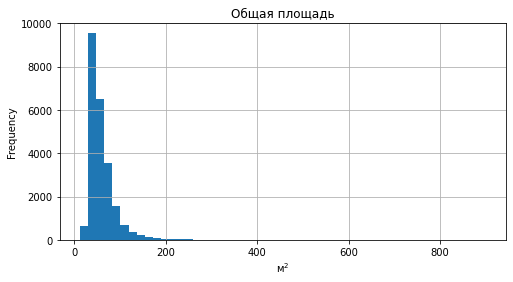

In [18]:
data.plot(
    y='total_area',
    kind='hist',
    bins=50,
    title='Общая площадь',
    legend=False,
    figsize=(8,4),
    grid=True
).set_xlabel('м$^2$')
plt.show()

Наблюдаем один достаточно узкий пик, характерного вида. Данные имеют распределение похожее на положительно смещенное Гауссовское. Видим, что квадратура больше 250 практически не встречается. Проверим какова доля объектов площадью больше 250 квадратных метров:

In [19]:
print(
    'Доля квартир с общей площадью больше 250:',
    len(data.query('total_area > 250')) / len(data)
)

Доля квартир с общей площадью больше 250: 0.004700800406555711


Таких квартир всего 0.4%. Построим гистограмму со значениями до 250 кв.м.

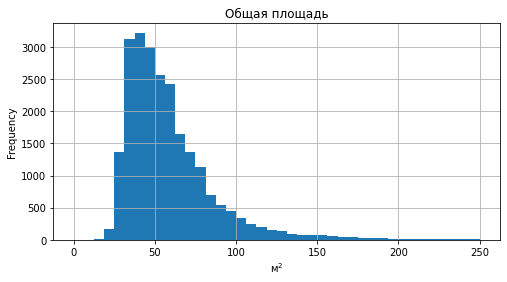

In [20]:
data.plot(
    y='total_area',
    kind='hist',
    bins=40,
    range=(0, 250),
    title='Общая площадь',
    legend=False,
    grid=True,
    figsize=(8,4)
).set_xlabel('м$^2$')
plt.show()

Построим гистограмму по значениям жилой площади:

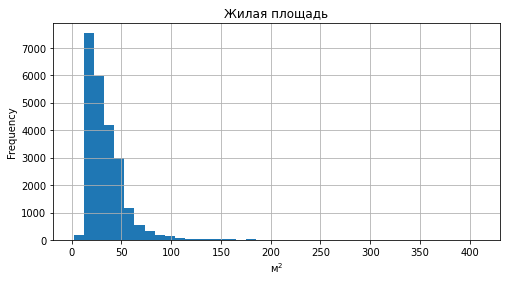

In [21]:
data.plot(
    y='living_area',
    kind='hist',
    bins=(40),
    title='Жилая площадь',
    legend=False,
    grid=True,
    figsize=(8, 4)
).set_xlabel('м$^2$')
plt.show()

Квартир со значением больше 140 почти не встречается. Определим долю таких квартир:

In [22]:
print(
    'Доля квартир с жилой площадью больше 140:',
    len(data.query('living_area > 140')) / len(data)
)

Доля квартир с жилой площадью больше 140: 0.007072375386439673


Изобразим гистограмму в пределах от 0 до 140:

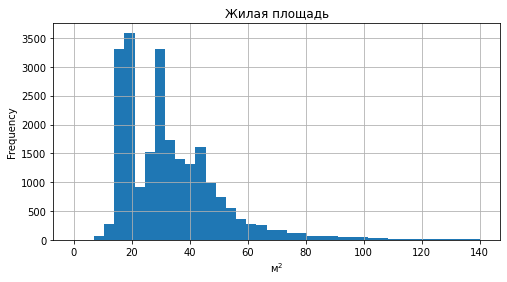

In [23]:
data.plot(
    y='living_area',
    kind='hist',
    bins=(40),
    range=(0, 140),
    title='Жилая площадь',
    legend=False,
    grid=True,
    figsize=(8, 4)
).set_xlabel('м$^2$')
plt.show()

Имеется достаточно близко лежащих пика 20 и 30. Возможно это связано с типовой планировкой квартир, варианты с жилыми площадями близкими к 20 и 30 наиболее часто встречаются в объявлениях.

Изобарзим гистограмму площадей кухни:

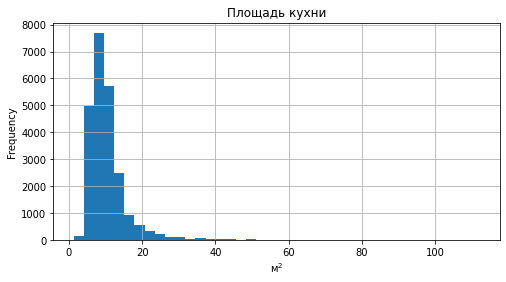

In [24]:
data.plot(
    y='kitchen_area',
    kind='hist',
    bins=(40),
    title='Площадь кухни',
    legend=False,
    grid=True,
    figsize=(8, 4)
).set_xlabel('м$^2$')
plt.show()

Как и в предыдущих случаях, ограничим область отображения гистограммы, предварительно проверив долю квартир с площадью кухни больше 45:

Доля квартир с площадью кухни больше 45: 0.0037267606826747977


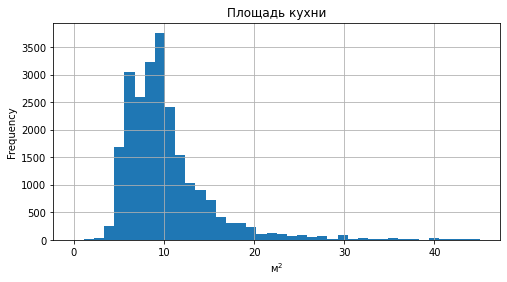

In [25]:
print(
    'Доля квартир с площадью кухни больше 45:',
    len(data.query('kitchen_area > 45')) / len(data)
)
data.plot(
    y='kitchen_area',
    kind='hist',
    bins=(40),
    range=(0,45),
    title='Площадь кухни',
    legend=False,
    grid=True,
    figsize=(8, 4)
).set_xlabel('м$^2$')
plt.show()

Выведем на экран гистограмму по стоимости объекта:

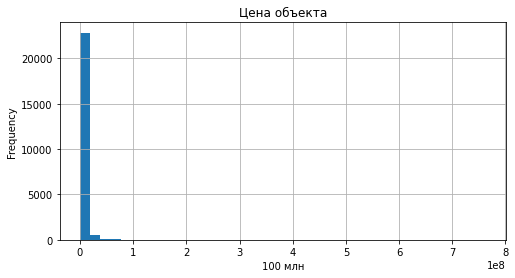

In [26]:
data.plot(
    y='last_price',
    kind='hist',
    bins=(40),
    title='Цена объекта',
    legend=False,
    grid=True,
    figsize=(8, 4)
).set_xlabel('100 млн')
plt.show()

Похоже несколько квартир были слишком дорогими, посмотрим насколько:

In [27]:
# Выведем 5 самых дорогих объектов
data['last_price'].sort_values(ascending=False).head()

12971    763000000.0
19540    420000000.0
14706    401300000.0
1436     330000000.0
15651    300000000.0
Name: last_price, dtype: float64

Сотни миллионов, это не очень далеко от среднестатистических цен на квартиры. Судя по тому, что нам встречались квартиры площадью около 800 квадратных метров, то вероятно все так и могло стоить. Изобразим гистограмму в диапазоне от 0 до 20 миллионов и традиционно проверим долю квартир дороже порогового значения.

Доля квартир с общей стоимостью больше 20 млн: 1.0


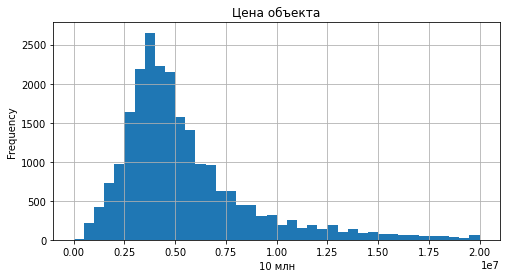

In [28]:
print(
    'Доля квартир с общей стоимостью больше 20 млн:',
    len(data.query('last_price > 20')) / len(data)
)
data.plot(
    y='last_price',
    kind='hist',
    bins=(40),
    range=(0, 2e7),
    title='Цена объекта',
    legend=False,
    grid=True,
    figsize=(8, 4)
).set_xlabel('10 млн')
plt.show()

Построим гистограмму по количеству комнат:

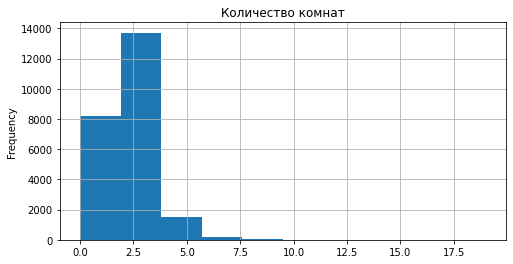

In [29]:
data.plot(
    y='rooms',
    kind='hist',
    bins=(10),
    title='Количество комнат',
    legend=False,
    grid=True,
    figsize=(8, 4)
)
plt.show()

17 комнат явно перебор, ограничимся 8 комнатами, посчитаем долю квартир, где больше 8 комнат и построим гистограмму заново:

Доля квартир с числом комнат больше 8: 0.0008046415110320586


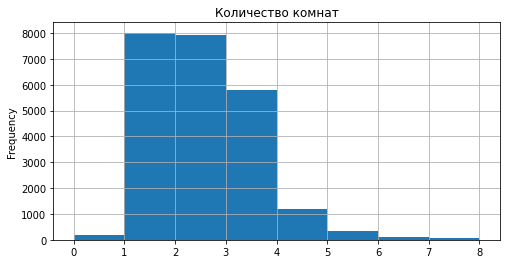

In [30]:
print(
    'Доля квартир с числом комнат больше 8:',
    len(data.query('rooms > 8')) / len(data)
)
data.plot(
    y='rooms',
    kind='hist',
    bins=(8),
    range=(0, 8),
    title='Количество комнат',
    legend=False,
    grid=True,
    figsize=(8, 4)
)
plt.show()

Выведем на экран гистограмму по значениям высот потолка:

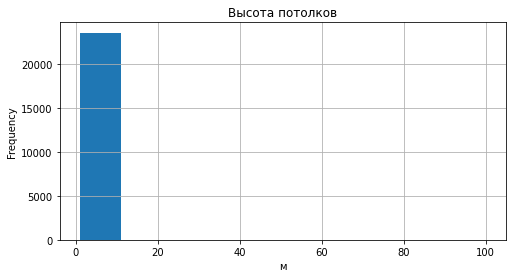

In [31]:
data.plot(
    y='ceiling_height',
    kind='hist',
    bins=(10),
    title='Высота потолков',
    legend=False,
    grid=True,
    figsize=(8, 4)
).set_xlabel('м')
plt.show()

Вот и первые аномалии, 100 метровых потолков явно не бывает в квартирах, посмотрим на 10 самых больших значений:

In [32]:
# Выведем 10 самых дорогих объектов
data['ceiling_height'].sort_values(ascending=False).head(10)

22869    100.0
3148      32.0
22336     32.0
21377     27.5
20478     27.0
5246      27.0
5807      27.0
4876      27.0
10773     27.0
21824     27.0
Name: ceiling_height, dtype: float64

Потолки высотой 32 метра, скорее всего человек ошибся порядком и не поставил разделительную точку/запятую или поставил ее не там. Значения высот потолков в диапазоне от 25 метров и больше разделим на 10. Однако есть потолок 100 метров в высоту, если учесть, что разделительная точка/запятая стоит не там, то это потолок 10 метров. Наиболее реалистично выглядят данные с высотой потолка от 2.5 до 4 метров. После изменения высот выведем обновленную гистограмму в диапазоне от 2.5 до 4 метров, а также долю невошедших в этот диапазон квартир.

Доля квартир с высотой потолков меньше 2.5 и больше 4 метров: 0.005463092364375556


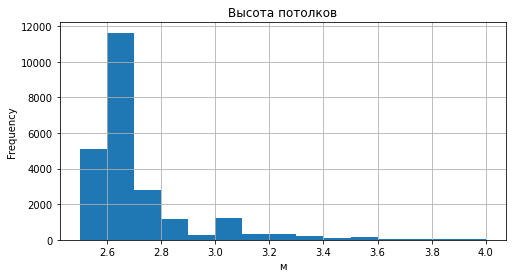

In [33]:
# Изменим высоту потолков равных или больше 25 метров
data.loc[data['ceiling_height'] >= 25, 'ceiling_height'] = (
    data.loc[data['ceiling_height'] >= 25, 'ceiling_height'] / 10
)

# Выведем долю квартир с высотой потолков меньше 2.5 и больше 4 метров
print(
    'Доля квартир с высотой потолков меньше 2.5 и больше 4 метров:',
    len(
        data.query('ceiling_height < 2.5 | ceiling_height > 4')
    ) / len(data)
)

# Выведем обновленную гистограмму
data.plot(
    y='ceiling_height',
    kind='hist',
    bins=(15),
    range=(2.5, 4),
    title='Высота потолков',
    legend=False,
    grid=True,
    figsize=(8, 4)
).set_xlabel('м')
plt.show()

Построим столбчатую диаграмму для типа этажа, так как в данном случае это будет нагляднее:

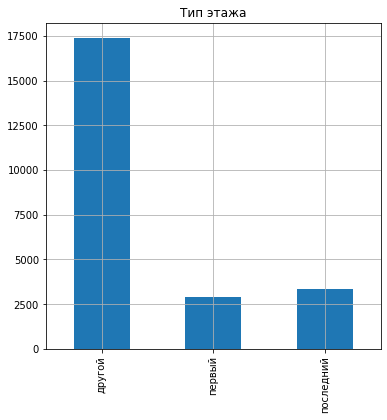

In [34]:
# Выведем круговую диаграмму
data.pivot_table(index='floor_type', values='floor', aggfunc='count').plot(
    y='floor',
    kind='bar',
    title='Тип этажа',
    legend=False,
    grid=True,
    figsize=(6, 6)
).set_xlabel('')
plt.show()

Выведем гистограмму общего числа этажей в доме:

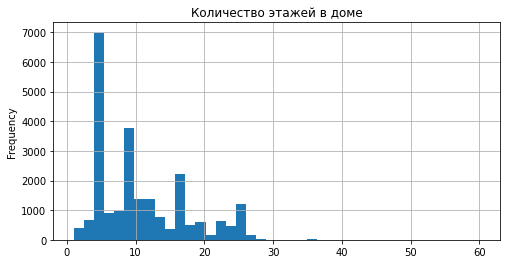

In [35]:
data.plot(
    y='floors_total',
    kind='hist',
    bins=(40),
    title='Количество этажей в доме',
    legend=False,
    grid=True,
    figsize=(8, 4)
)
plt.show()

Наблюдаем несколько пиков, что свойственно для наиболее популярных вариантов застройки. Выведем долю квартир, где количество этажей больше 29, и изобразим гистограмму в диапазоне этажей от 1 до 29:

Доля квартир с общим числом этажей в доме от 1 до 29: 0.0013551857027908356


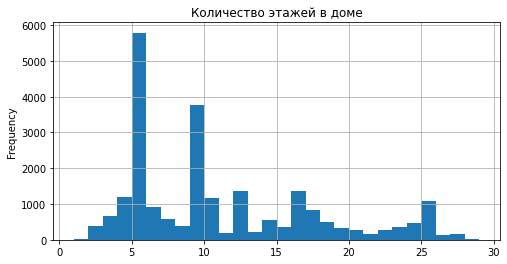

In [36]:
print(
    'Доля квартир с общим числом этажей в доме от 1 до 29:',
    len(data.query('floors_total > 29')) / len(data)
)

data.plot(
    y='floors_total',
    kind='hist',
    bins=(28),
    range=(1, 29),
    title='Количество этажей в доме',
    legend=False,
    grid=True,
    figsize=(8, 4)
)
plt.show()

Четко видны наиболее распределенные типы зданий: 5-этажные, 9-этажные.

Изобразим гистограмму расстояния до центра города в метрах:

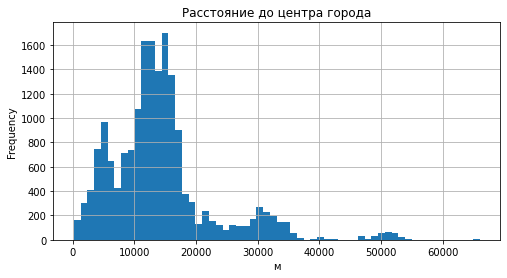

In [37]:
data.plot(
    y='cityCenters_nearest',
    kind='hist',
    bins=(60),
    title='Расстояние до центра города',
    legend=False,
    grid=True,
    figsize=(8, 4)
).set_xlabel('м')
plt.show()

Видно несколько пиков, что похоже на отдельные районы, либо некоторые пики относятся к селам/деревням, в которых в качестве расстояния до центра города указано расстояние до центра ближайшего города. Посмотрим долю квартир, у которых расстояние до центра города больше 55000 метров и построим гистограмму от 0 до 55000.

Доля квартир с расстоянием до центра города более 55000 метров: 0.0005081946385465633


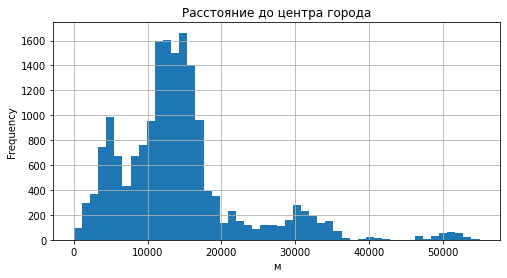

In [38]:
print(
    'Доля квартир с расстоянием до центра города более 55000 метров:',
    len(data.query('cityCenters_nearest > 55000')) / len(data)
)

data.plot(
    y='cityCenters_nearest',
    kind='hist',
    bins=(50),
    range=(0, 55000),
    title='Расстояние до центра города',
    legend=False,
    grid=True,
    figsize=(8, 4)
).set_xlabel('м')
plt.show()

Построим гистограмму расстояния до ближайшего парка:

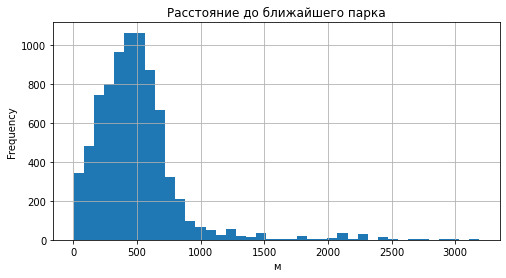

In [39]:
data.plot(
    y='parks_nearest',
    kind='hist',
    bins=(40),
    title='Расстояние до ближайшего парка',
    legend=False,
    grid=True,
    figsize=(8, 4)
).set_xlabel('м')
plt.show()

Изобаризим долю квратир, которые находятся более чем в 3000 метрах от ближайшего парка и построим гистограмму заново:

Доля квартир с расстоянием до ближайшего парка более 3000 метров: 0.00016939821284885445


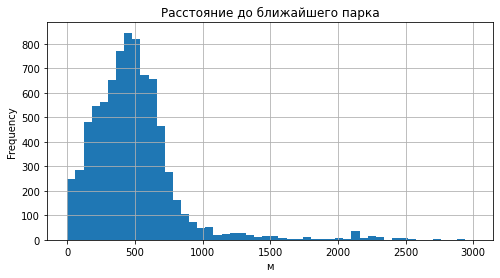

In [40]:
print(
    'Доля квартир с расстоянием до ближайшего парка более 3000 метров:',
    len(data.query('parks_nearest > 3000')) / len(data)
)

data.plot(
    y='parks_nearest',
    kind='hist',
    bins=(50),
    range=(0, 3000),
    title='Расстояние до ближайшего парка',
    legend=False,
    grid=True,
    figsize=(8, 4)
).set_xlabel('м')
plt.show()

Все вышеперечисленные доли были показаны для того, чтобы понять, можно ли отбросить такое количество данных для дальнейшей работы с ними. Отфильтруем данные:

In [41]:
# Отфильтруем столбец 'total_area'
data_filtered = data.query('total_area <= 250')

# Отфильтруем столбец 'living_area'
data_filtered = data_filtered.query('living_area <= 140')

# Отфильтруем столбец 'kitchen_area'
data_filtered = data_filtered.query('kitchen_area <= 45 ')

# Отфильтруем столбец 'last_price'
data_filtered = data_filtered.query('last_price <= 2e7 | last_price.isna()')

# Отфильтруем столбец 'rooms'
data_filtered = data_filtered.query('rooms <= 8 | rooms.isna()')

# Отфильтруем столбец 'ceiling_height'
data_filtered = data_filtered.query('ceiling_height >= 2.5 & ceiling_height <= 4')

# Отфильтруем столбец 'floors_total'
data_filtered = data_filtered.query('floors_total <= 29 | floors_total.isna()')

# Отфильтруем столбец 'cityCenters_nearest'
data_filtered = data_filtered.query('cityCenters_nearest <= 55000 | cityCenters_nearest.isna()')

# Отфильтруем столбец 'parks_nearest'
data_filtered = data_filtered.query('parks_nearest <= 3000 | parks_nearest.isna()')

print('Доля отсеянных данных:',
      (data.shape[0] - data_filtered.shape[0]) / data.shape[0]
     )

Доля отсеянных данных: 0.038707491635963244


По каждому из рассмотренных столбцов были построены гистограммы, отсеяны редкие или выбивающиеся значения, обработаны аномалии. Суммарно было отсеяно порядка 900 строк, что составляет почти 4% от общего количества.

### Анализ скорости продажи квартир
<a id='speed_sell'></a>

Посмотрим на распределение количества дней, в течение которых было размещено объявление, также выведем список характерных значений:

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

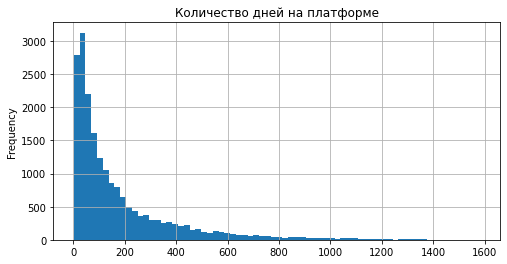

In [42]:
data_filtered.plot(
    y='days_exposition',
    kind='hist',
    title='Количество дней на платформе',
    legend=False,
    bins=(70),
    grid=True,
    figsize=(8, 4)
)

data['days_exposition'].describe()

Медианное время значительно меньше среднего, что может свидетельствовать о большом количестве выбросов. Выведем гитограмму в пределах от 0 до 150 дней, чтобы рассмотреть имеющиеся нехарактерные пики:

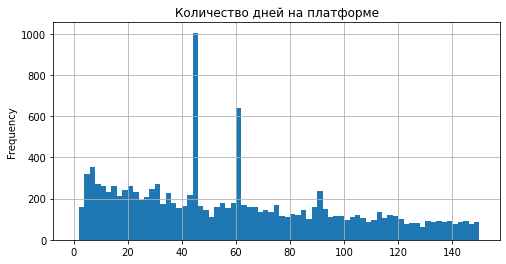

In [43]:
data_filtered.plot(
    y='days_exposition',
    kind='hist',
    bins=(75),
    title='Количество дней на платформе',  
    legend=False,
    grid=True,
    range=(0, 150),
    figsize=(8, 4)
)
plt.show()

Заметим, что имеется 2 нехарактерный пика: на 45 и 60 день, что могло повлиять на распределение. Возможно система начинает активнее предлагать пользователям квартиры, объявление которых размещено дольше данных значений. Либо система снимает данные объявления в автоматическом режиме. Построим диаграмму размаха для оценки выбросов:

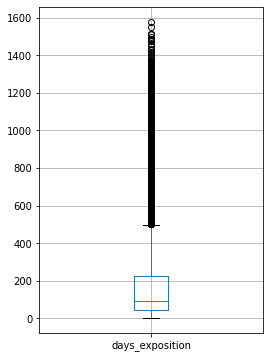

In [44]:
data_filtered.plot(
    y='days_exposition',
    kind='box',
    grid=True,
    figsize=(4, 6)
)
plt.show()

Выбросов очень много, верхний "ус" расположен на значении 500 дней. Все что больше этого значения будем считать слишком долгой продажей. Слишком быстрыми продажами будем называть квартиры проданные быстрее 30 дней.

Продажи объектов имеют Пуассоновское распределение, обнаружилось 3 нехарактерных пика, которые мы связали со спецификой работы сервиса, которые могут влиять на общее распределение продаж.

### Факторный анализ стоимости квартир
<a id='price_factor'></a>

Изучим как стоимость квартир зависит от следующих факторов:
* общая площадь;
* жилая площадь;
* площадь кухни;
* количество комнат;
* тип этажа, на котором размещена квартира;
* дата размещения (день недели, месяц, год).

Выведем диаграммы рассеяния по всем параметрам в зависимости от цены и матрицу корреляции для обнаружения возможных зависимостей с количественными данными:

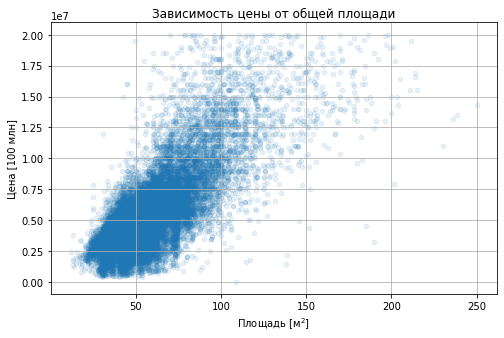

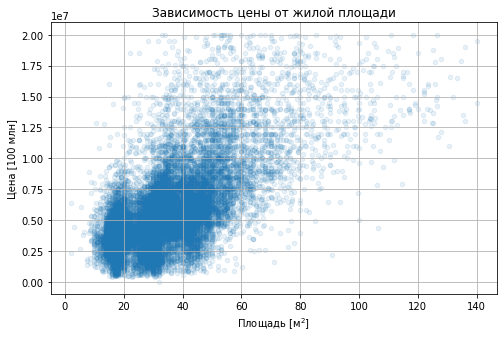

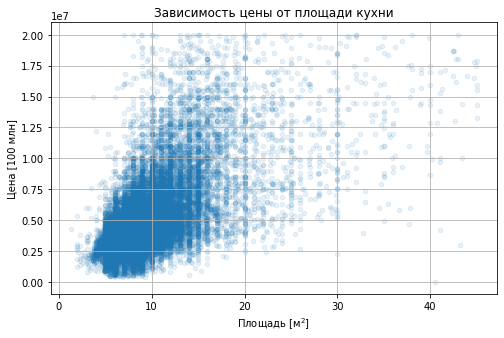

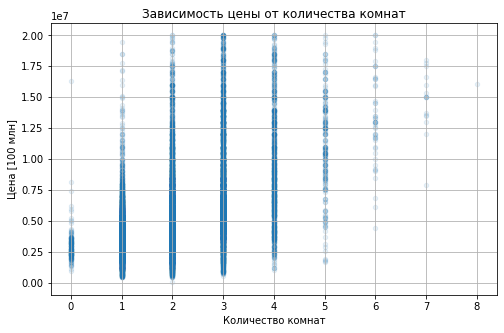

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.771308,0.667763,0.593651,0.503508
total_area,0.771308,1.000000,0.928150,0.567526,0.797380
living_area,0.667763,0.928150,1.000000,0.338186,0.873043
kitchen_area,0.593651,0.567526,0.338186,1.000000,0.219818
rooms,0.503508,0.797380,0.873043,0.219818,1.000000


In [45]:
# Создадим функцию для отображения диаграммы сассеяния
def scatter_plot_create(data, factor, name_title, xlabel):
    data.plot(
        x=factor,
        y='last_price',
        kind='scatter',
        title=name_title,
        xlabel=xlabel,
        ylabel='Цена [100 млн]',
        alpha=0.1,
        grid=True,
        figsize=(8, 5)
    )
    plt.show()

# Создадим списки для вывода диаграмм
factors = [
    'total_area',
    'living_area',
    'kitchen_area',
    'rooms'
]

names_title = [
    'Зависимость цены от общей площади',
    'Зависимость цены от жилой площади',
    'Зависимость цены от площади кухни',
    'Зависимость цены от количества комнат'
]

xlabels = [
    'Площадь [м$^2$]',
    'Площадь [м$^2$]',
    'Площадь [м$^2$]',
    'Количество комнат'
]
# Выведем диаграммы рассеяния
for i in range(len(factors)):
    scatter_plot_create(data_filtered, factors[i], names_title[i], xlabels[i])

# Выведем матрицу корреляции
data_filtered[[
        'last_price',
        'total_area',
        'living_area',
        'kitchen_area',
        'rooms',
]].corr()


В качестве проверки, не испорчены ли данные, можно посмотреть на зависимость общей площади от жилой площади, где наблюдается очень сильная положительная корреляция. Также сильно коррелируют общая площадь и жилая площадь с количеством комнат. Низкая корреляция наблюдается между жилой площадью и площадью кухни, между площадью кухни и количеством комнат. Все это звучит логично, значит данные не были испорчены. 

Наибольшая корреляция с ценой квартиры из представленных факторов наблюдается у общей площади, что звучит наиболее разумно. Создадим новый столбец `total_area_category`, в котором будут отображаться категории размеров квартир:
- площадь до 25 кв.м. - D
- площадь от 25 до 50 кв.м. - C
- площадь от 50 до 80 кв.м. - B
- площадь от 80 до 110 кв.м. - A
- площадь от 110 до 150 кв.м. - S
- площадь от 150 кв.м. - SS

После чего создадим сводную таблицу с медианными значениями стоимости по каждой категории и построим график зависимости медианной цены от категории площади квартиры:

,Медианная цена,Количество
Категория общей площади,,
D,2400000.0,226
C,3647500.0,10874
B,5500000.0,8623
A,9315000.0,2241
S,12850000.0,580
SS,15000000.0,155


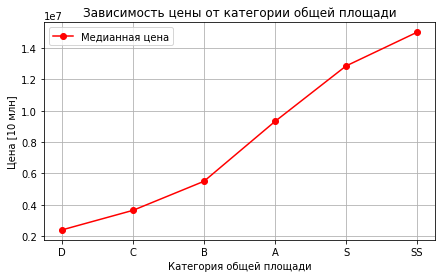

In [46]:
# Создадим функцию для создания категорий по общей площади
def total_category(area):
    if area <= 25:
        return 'D'
    
    if 25 < area <= 50:
        return 'C'
    
    if 50 < area <= 80:
        return 'B'
    
    if 80 < area <= 110:
        return 'A'
    
    if 110 < area <= 150:
        return 'S'
    
    else:
        return 'SS'

    
# Добавим новый столбец с категориями 
data_filtered['total_area_category'] = (
    data_filtered['total_area']
    .apply(total_category)
)

# Создадим сводную таблицу по категориям общей площади
data_category_total_area = data_filtered.pivot_table(
    index='total_area_category',
    values='last_price',
    aggfunc=['median', 'count']
)

# Переименуем столбец и индексы
data_category_total_area.columns = ['Медианная цена', 'Количество']
data_category_total_area.index.name = 'Категория общей площади'

# Построим график зависимости цены от медианной площади
data_category_total_area.sort_values(by='Медианная цена').plot(
    y='Медианная цена',
    title='Зависимость цены от категории общей площади',
    ylabel='Цена [10 млн]',
    marker='o',
    color='red',
    figsize=(7, 4),
    grid=True
)

data_category_total_area.sort_values(by='Медианная цена')

Цена явно зависит от общей площади квартиры - чем больше площадь, тем больше цена, что нам и подсказывала сильная корреляция.

Построим такие же графики для жилой площади и площади кухни и общую сводную таблицу.  
Для столбца `kitchen_area` категории будут следующие:
- площадь до 5 кв.м. - D
- площадь от 5 до 10 кв.м. - C
- площадь от 10 до 15 кв.м. - B
- площадь от 15 до 25 кв.м. - A
- площадь от 25 до 35 кв.м. - S
- площадь от 35 кв.м. - SS

Для столбца `living_area` категории будут следующие:
- площадь до 15 кв.м. - D
- площадь от 15 до 25 кв.м. - C
- площадь от 25 до 40 кв.м. - B
- площадь от 40 до 55 кв.м. - A
- площадь от 55 до 70 кв.м. - S
- площадь от 70 кв.м. - SS

,Цена по общей площади,Кол-во по общей площади,Цена по жилой площади,Кол-во по жилой площади,Цена по площади кухни,Кол-во по площади кухни
Категория площади,,,,,,
D,2400000.0,226,3400000.0,1042,3560000.0,4
C,3647500.0,10874,3600000.0,7238,3650000.0,57
B,5500000.0,8623,4700000.0,8471,3392333.0,981
A,9315000.0,2241,6300000.0,4263,3600000.0,7238
S,12850000.0,580,9600000.0,1071,4490000.0,6535
SS,15000000.0,155,13000000.0,614,6750000.0,7884


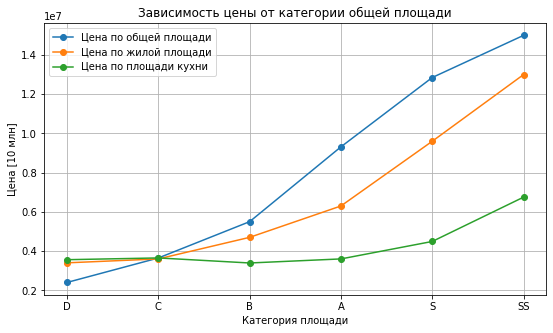

In [47]:
# Создадим функцию для создания категорий по жилой площади
def living_category(area):
    if area <= 15:
        return 'D'
    
    if 15 < area <= 25:
        return 'C'
    
    if 25 < area <= 40:
        return 'B'
    
    if 40 < area <= 55:
        return 'A'
    
    if 55 < area <= 70:
        return 'S'
    
    else:
        return 'SS'

    
# Создадим функцию для создания категорий по площади кухни
def kitchen_category(area):
    if area <= 5:
        return 'D'
    
    if 5 < area <= 10:
        return 'C'
    
    if 10 < area <= 15:
        return 'B'
    
    if 15 < area <= 25:
        return 'A'
    
    if 25 < area <= 35:
        return 'S'
    
    else:
        return 'SS'
    
# Добавим новые столбцы с категориями 
data_filtered['living_area_category'] = (
    data_filtered['living_area']
    .apply(living_category)
)

data_filtered['kitchen_area_category'] = (
    data_filtered['living_area']
    .apply(kitchen_category)
)

# Создадим сводную таблицу по категориям жилой площади
data_category_living_area = data_filtered.pivot_table(
    index='living_area_category',
    values='last_price',
    aggfunc=['median', 'count']
)

# Создадим сводную таблицу по категориям площади кухни
data_category_kitchen_area = data_filtered.pivot_table(
    index='kitchen_area_category',
    values='last_price',
    aggfunc=['median', 'count']
)

# Создадим общую сводную таблицу, объединив созданные
data_category_area = pd.concat(
    [
        data_category_total_area,
        data_category_living_area,
        data_category_kitchen_area
    ],
    axis=1
)

# Переименуем столбцы и индексы
data_category_area.columns = [
    'Цена по общей площади',
    'Кол-во по общей площади',
    'Цена по жилой площади',
    'Кол-во по жилой площади',
    'Цена по площади кухни',
    'Кол-во по площади кухни'
]

data_category_area.index.name = 'Категория площади'

# Построим график зависимости цены от медианной площади
data_category_area.sort_values(by='Цена по общей площади').plot(
    y=[
        'Цена по общей площади',
        'Цена по жилой площади',
        'Цена по площади кухни'
    ],
    title='Зависимость цены от категории общей площади',
    ylabel='Цена [10 млн]',
    marker='o',
    figsize=(9, 5),
    grid=True
)

data_category_area.sort_values(by='Цена по общей площади')

Среди представленных трех факторов наибольшим образом цена зависит от общей площади, на нее люди как правило смотрят в первую очередь, затем уже на распределение территории по жилой и нежилой зонам.

Построим столбчатую диаграмму для просмотра медианной цены квартиры в зависимости от количества комнат в ней:

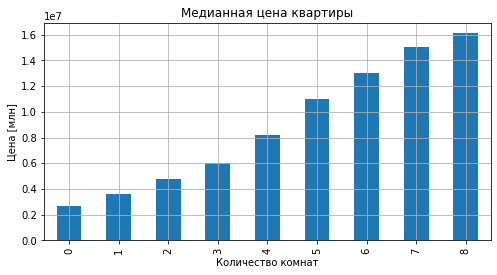

In [48]:
# Построим столбчатую диаграмму по сводной таблице
data_filtered.pivot_table(
    index='rooms',
    values='last_price',
    aggfunc='median'
).plot(
    kind='bar',
    y='last_price',
    label='Цена',
    xlabel='Количество комнат',
    ylabel='Цена [млн]',
    title='Медианная цена квартиры',
    legend=False,
    figsize=(8, 4),
    grid=True
)
plt.show()

Диаграмма показывает, что цена зависит от количества комнат, однако следует учесть, что количество комнат очень сильно коррелирует с общей площадью, которая в свою очередь оказывает сильное влияние на стоимость объекта. Можем заключить, что зависимость скорее всего есть, но на вряд ли она линейная, так как коэффициент корреляции Пирсона указывает лишь на линейную взаимосвязь данных.

Создадим столбчатую диаграмму, на которой изобразим медианную стоимость квартир в зависимости от типа этажа, однако стоит учитывать, что в выборке присутствуют и одноэтажные и двухэтажные дома, такие данные не корректны для данного фактора. Построим диаграмму по объектам, где этаж больше или равен 5:

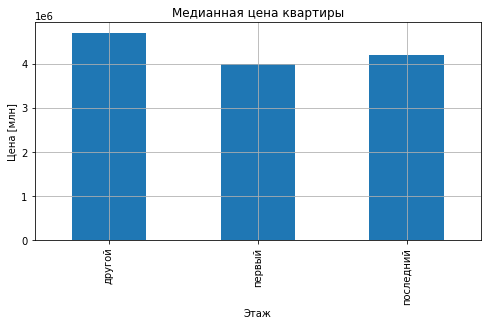

In [49]:
# Построим столбчатую диаграмму по сводной таблице
ax=data_filtered.query('floors_total >= 5').pivot_table(
    index='floor_type',
    values='last_price',
    aggfunc='median'
).plot(
    y='last_price',
    kind='bar',
    label='Цена',
    xlabel='Этаж',
    ylabel='Цена [млн]',
    title='Медианная цена квартиры',
    legend=False,
    grid=True,
    figsize=(8, 4)
)

Разница в цене относительно небольшая, однако люди все таки больше предпочитают жить не на первом и не на последнем этажах, что обусловлено повышенной ценой на объекты, находящиеся на `других` этажах.

Построим столбчатые диаграммы и сводные таблицы для цены квартиры в зависимости от даты размещения объявления:

,Цена по дню недели,Кол-во квартир
День недели,,
1,4575000.0,3454
2,4650000.0,4024
3,4600000.0,3804
4,4532500.0,4092
5,4500000.0,3848
6,4500000.0,1858
7,4500000.0,1619


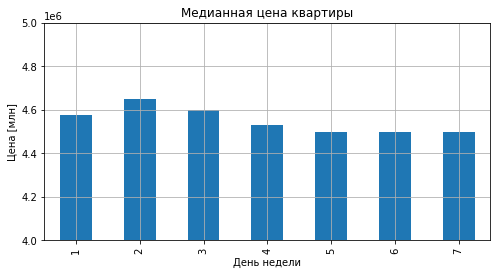

In [50]:
# Создадим сводную таблицу с индексами дней недели и медианной стоимостью в значениях
data_day_price = data_filtered.pivot_table(
    index='day_week_exposition',
    values='last_price',
    aggfunc=['median', 'count']
)

# Переименуем столбцы и индексы
data_day_price.columns = [
    'Цена по дню недели',
    'Кол-во квартир'
]

data_day_price.index.name = 'День недели'

# Построим столбчатую диаграмму по сводной таблице
data_day_price.plot(
    y='Цена по дню недели',
    kind='bar',
    label='Цена',
    xlabel='День недели',
    ylabel='Цена [млн]',
    title='Медианная цена квартиры',
    legend=False,
    grid=True,
    figsize=(8, 4)
)
plt.ylim(4e6, 5e6)

data_day_price.round(2)

Цены меняются совсем незначительно, можно сказать, что цена вообще не зависит от того, в какой день недели разместили объявление. Также заметна общая тенденция - размещаются объявления преемущественно с понедельника по пятницу, в выходные количество объявлений кратно меньше.

Изобразим столбчатую диаграмму по месяцам:

Разброс значений цены: 400000.0


,Цена по месяцам,Кол-во квартир
Месяц,,
1,4500000.0,1428
2,4590000.0,2527
3,4550000.0,2491
4,4700000.0,2282
5,4500000.0,1215
6,4300000.0,1683
7,4550000.0,1619
8,4500000.0,1677
9,4600000.0,1902


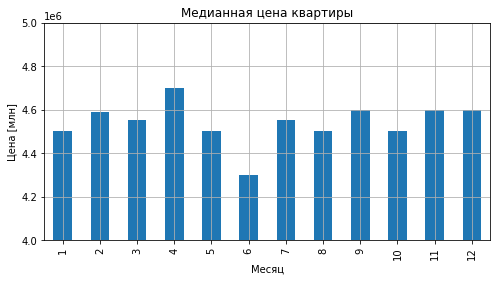

In [51]:
# Создадим сводную таблицу с индексами месяцев и медианной стоимостью в значениях
data_month_price = data_filtered.pivot_table(
    index='month_exposition',
    values='last_price',
    aggfunc=['median', 'count']
)

# Переименуем столбцы и индексы
data_month_price.columns = [
    'Цена по месяцам',
    'Кол-во квартир'
]

data_month_price.index.name = 'Месяц'

# Построим столбчатую диаграмму по сводной таблице
data_month_price.plot(
    y='Цена по месяцам',
    kind='bar',
    label='Цена',
    xlabel='Месяц',
    ylabel='Цена [млн]',
    title='Медианная цена квартиры',
    legend=False,
    grid=True,
    figsize=(8, 4)
)
plt.ylim(4e6, 5e6)

print('Разброс значений цены:', 
      data_month_price['Цена по месяцам'].max() -
      data_month_price['Цена по месяцам'].min())

data_month_price.round(2)

Разлет значений составляет 380000 с максимумом цены в апреле и минимумом цены в июне. Периодом повышенного спроса традиционно считаются месяцы с февраля до лета. В этот период цены растут, а затем как правило падают. Такая тенденция наблюдается на графике не в полной мере, но макимальная и минимальная цены соответствуют общей тенденции.

Изобразим столбчатую диаграмму по годам:

Разброс значений цены: 2225000.0


,Цена по годам,Кол-во квартир
Год,,
2014,6625000.0,116
2015,5100000.0,1103
2016,4422000.0,2643
2017,4400000.0,7840
2018,4500000.0,8237
2019,4990000.0,2760


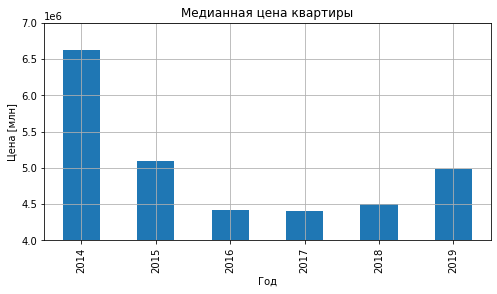

In [52]:
# Создадим сводную таблицу с индексами соответствующими годам и медианной стоимостью в значениях
data_year_price = data_filtered.pivot_table(
    index='year_exposition',
    values='last_price',
    aggfunc=['median', 'count']
)

# Переименуем столбцы и индексы
data_year_price.columns = [
    'Цена по годам',
    'Кол-во квартир'
]

data_year_price.index.name = 'Год'

# Построим столбчатую диаграмму по сводной таблице
data_year_price.plot(
    y='Цена по годам',
    kind='bar',
    label='Цена',
    xlabel='Год',
    ylabel='Цена [млн]',
    title='Медианная цена квартиры',
    legend=False,
    grid=True,
    figsize=(8, 4)
)
plt.ylim(4e6, 7e6)

print('Разброс значений цены:', 
      data_year_price['Цена по годам'].max() -
      data_year_price['Цена по годам'].min())

data_year_price.round(2)

Наблюдается резкое падение цен в 2016 году, что было связано с кризисом, который повлек за собой уменьшение спроса на недвижимость, так как платежеспособность людей понизилась, также в том году была увеличена процентная ставка на ипотеки, что сказалось на показателях средней цены квартиры.

Таким образом можем выделить два основных фактора, влияющих на цену объекта в наибольшей степени:
* общая площадь объекта как количественное представление недвижиого имущества
* с течением времени внутри отдельного региона, государтсва или мира могут происходить кризисы, экономические подъемы, приниматься новые законы, которые могут повлиять на цену объектов. Такие крупные события оказывают влияние в долгосрочной перспективе, поэтому зависимость цен на квартиры в разные года может разительно отличаться

### Анализ топов продаж
<a id='top_sells'></a>

Выведем сводную таблицу, в которой отобразим топ-10 регионов с наибольшим числом проданных квартир, в которой отобразим среднюю стоимость квадратного метра. Для наглядности выведем и столбчатую диаграмму по топам.

,Цена за кв.м.,Кол-во объявлений
Нас. пункт,,
санкт-петербург,201876.77,14822
посeлок мурино,172742.72,519
посeлок шушары,154441.00,439
всеволожск,128876.85,395
пушкин,187774.61,354
колпино,131964.22,336
посeлок парголово,196957.11,326
гатчина,121910.62,307
село кудрово,184687.10,299


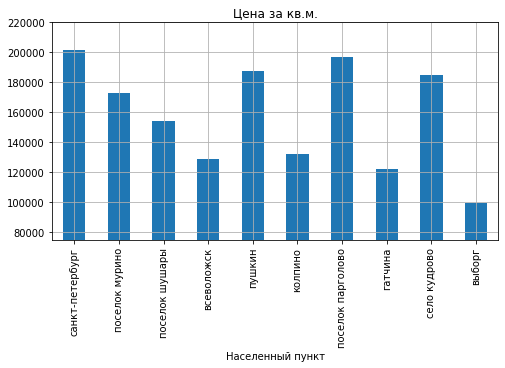

In [53]:
# Создадим сводную таблицу
sells_area_price = data_filtered.pivot_table(
    index='locality_name',
    values='price_per_square_meter',
    aggfunc=['mean', 'count']
)

# Переименуем столбцы
sells_area_price.columns = ['Цена за кв.м.', 'Кол-во объявлений']

# Переименуем индексы
sells_area_price.index.name = 'Нас. пункт'

# Создадим таблицу топ-10 продаж
top_sells_area_price = sells_area_price.sort_values(
    by='Кол-во объявлений', ascending=False
).head(10).round(2)

# Построим столбчатую диаграмму по сводной таблице
top_sells_area_price.plot(
    y='Цена за кв.м.',
    kind='bar',
    label='Цена',
    xlabel='Населенный пункт',
    title='Цена за кв.м.',
    legend=False,
    grid=True,
    figsize=(8, 4)
)
plt.ylim(75e3, 2.2e5)

top_sells_area_price

Самая высокая цена ожидаемо наблюдается у Санкт-Петербурга. Неожиданно близкие к Петербургу значения средней цены наблюдается у поселка Парголово и села Кудрово. Возможно в данных поселках активно продавались коттеджи с участком вокруг него, но имеются данные только по площади внутри объекта. Данные поселки находятся внутри КАД, что может сказаться на цене жилья. Также высокие значения наблюдаются у города Пушкин. Наличие большого количества достопримечательностей и парков (таких как Екатерининский дворец, Александровский и Екатерининский парки и др.) вблизи жилых объектов вероятно оказало сильное влияние на цену недвижимости.

Самые низкие показатели наблюдаются у Выборга. Данный город очень удален от ближайшего экономического центра - Санкт-Петербурга, возможно это повлияло на ценообразование.

### Влияние расстояния от центра
<a id='range_center'></a>

Проанализируем характер изменения средней цены от расстояния до центра в городе Санкт-Петербург. Сгруппируем данные по каждому километру удаления от центра города и выведем график.

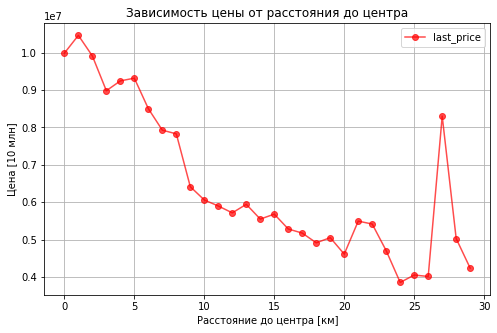

In [54]:
# Отфильтруем данные по названию города и создадим сводную таблицу
(
    data_filtered.query('locality_name == "санкт-петербург"')
    .pivot_table(
        index='cityCenters_nearest_km',
        values='last_price',
    )
    # Создадим график по данным сводной таблицы
    .plot(
        y='last_price',
        title='Зависимость цены от расстояния до центра',
        ylabel='Цена [10 млн]',
        xlabel='Расстояние до центра [км]',
        marker='o',
        color='red',
        alpha=0.7,
        figsize=(8,5),
        grid=True,
    )
)
plt.show()

С расстоянием очевидно цена начинает падать, однако имеется резкий пик в области 27 километров. На этом расстоянии находится Петродворцовый район Санкт-Петербурга, где присутствует много жилья премиум-класса и частным сектором. В данном районе присутсвует невероятное количество достопримечательностей и парков. Также нельзя и исключать, что это могут быть просто выбросы. Построим гистограмму по расстоянию до центра:

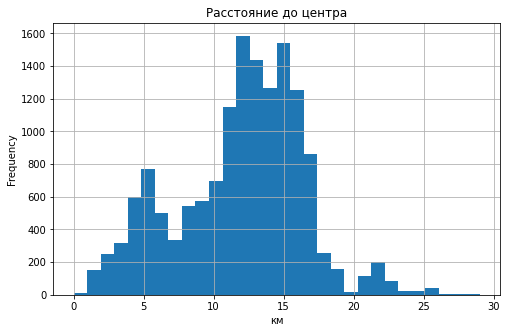

In [55]:
data_filtered.query('locality_name == "санкт-петербург"').plot(
    y='cityCenters_nearest_km',
    kind='hist',
    bins=(30),
    title='Расстояние до центра',
    legend=False,
    grid=True,
    figsize=(8, 5)
).set_xlabel('км')
plt.show()

На расстоянии свыше 26 км объявлений практически не встречается. На расстоянии 5-10 км наблюдается падение количества объявлений, это можно связать с началом Невской губы, соответственно територии стало меньше для жилых районов и для их продажи.

## Выводы
<a id='conclusions'></a>

Был проведен исследовательский анализ стоимости квартир в Санкт-Петербурге и соседних населенных пунктах по данным сервиса Яндекс Недвижимость. 

Мы изучили общую информацию о данных и сформулированы первые предположения о выбросах и аномальных значениях. Произведена предобработка данных:
* были найдены все пропуски в данных. Пропуски в столбцах `ceiling_height`, `floors_total` и `days_exposition` были заполнены медианными значеними. Пропуски в `is_apartment`, `balcony`, `parks_around3000` и `ponds_around3000` заполнены нулями. Пропуски в `living_area` и `kitchen_area` заполнены медианными значениями с учетом значений из столбца `total_area`. В столбце `locality_name` пропуски заполнили значениями `unknown`;


* были изменены типы данных столбцов:  
&emsp; `first_day_exposition` в *DateTime*  
&emsp; `floors_total` в *int64*  
&emsp; `balcony` в *int64*  
&emsp; `parks_around3000` в *int64*  
&emsp; `ponds_around3000` в *int64*  
&emsp; `days_exposition` в *int64*


* произведена обработка неявных дубликатов в названиях населенных пунктов. На данном этапе встретились проблемы в данных иного характера: названия населенных пунктов содержали в себе и латиницу и кириллицу, что не позволяет в полной мере произвести обработку неявных дубликатов;


После предобработки мы рассмотрели основные параметры, способные повлиять на ценообразование объекта, по каждому из параметров построили гистограммы и исключили из расчета выбивающиеся значения. Также обработали аномальные значения.

Произвели оценку скорости продаж квартир, выявили слишком быстрые (быстрее 30 дней) и слишком долгие (больше 550 дней) продажи. При более детальном рассмотрении обнаружили нетипично большое количество продаж на 45, 60 и 95 дни, выдвинули предположения о работе сервиса: 

- на платформе реализована система снятия объявлений по прошествию контрольных временных точек;
- по прошествии контрольных временных точек объявления начинают выводиться в топ поиска.

Произвели факторный анализ, по результатам которого определили, что стоимость квартиры наибольшим образом зависит от общей площади и года продажи. Второй фактор говорит о том, что необходимо учитывать общую экономическую ситуацию в регионе/стране, следить за готовящимеся или вступившими в силу законопроектами, за ключевой ставкой центробанка и многими другими факторами, которые могут разительно повлиять на рынок недвижимости в долгосрочной перспективе.

Определили топ-10 населенных пунктов по продажам квартир и изучили среднюю стоимость за квадратный метр. Самым продаваемым и самым дорогим оказался Санкт-Петербург - огромный город, экономический центр среди представленных населенных пунктов. Самый низкий показатель оказался у города Выборг - он находится на границе с финляндией, очень удален от Санкт-Петербурга, вероятно это способствовало снижению цены за квадратный метр. Также на примере города Пушкин можно предположить, что огромное значение в ценообразовании имеет наличие вблизи парков и достопримечательностей, так как показатели у Санкт-Петербурга и города Пушкин не сильно отличались.

Посмотрели как меняется цена на квартиры в Петербурге в зависимости от расстояния до центра города. Очевидна общая тенденция падения цен с удалением от центра, однако была обнаружена область на расстоянии в 27 км, где средняя цена на квартиры были неожиданно высокими. Было выдвинуто два предположения:
- в данные попал петродворцовый район, с множеством элитного жилья;
- данная область ни что иное как выброс, так как по ней было всего 68 объявлений

Таким образом, при оценке стоимости квартиры необходимо учитывать в первую очередь общую площадь объекта, наличие исторических достопримечательностей, парков и водоемов, удаленность от экономического центра региона, и общую экономическую ситуацию.